# PyWinEA basics

In [1]:
# External dependencies
import numpy as np
from sklearn.naive_bayes import GaussianNB                         
from sklearn.model_selection import StratifiedKFold 

In [2]:
# PyWin dependencies
from pywinEA.algorithm import GA, NSGA2, SPEA2
from pywinEA.population import Population, BlockPopulation
from pywinEA.fitness import MonoObjectiveCV
from pywinEA.operators import TournamentSelection, RouletteWheel
from pywinEA.wrapper import Parallel, IslandModel
from pywinEA.visualization import Plotter, GAevaluator, MOAevaluator
from pywinEA.dataset import load_demo

The operators defined in the operators module can be defined and passed as arguments. However the **GA** algorithm implements **OnePoint** cross-over strategy, **RandomMutation** mutation strategy, **AnnihilateWorse** annihilation strategy and **BestFitness** survivor selection automatically. The multiobjective algorithms also implements **OnePoint**, **RandomMutation** and **TournamentSelection(k=2, winners=1)** by default.

In [3]:
# Load data
demo = load_demo()
x_data = demo['x_data']
y_data = demo['y_data']
features = demo['features']


	Breast Cancer Wisconsin dataset. It contains a total of 569 samples of tumor and malignant cells. 
	Data labeled 1 corresponds to malignant cells, while data labeled 0 corresponds to benign cells. 
	The 30 characteristics contain real values obtained from images of cell nuclei. For more information:

			http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


	The returned value is a dictionary where 'x_data' are the predictor variables, 'y_data' the class 
	labels and  'features' the name of the characteristics.
	


In [4]:
# Add noisy variables
num_noisy_vars = 20

for n in range(num_noisy_vars):
    features = np.append(features, 'noisy_var_%d' % n)
    x_data = np.hstack([x_data, np.random.uniform(0, 10, size=x_data.shape[0]).reshape(-1, 1)])
    
print('Num of features %d\nx_data shape %r' % (len(features), x_data.shape))

Num of features 50
x_data shape (569, 50)


In [5]:
# Define estimator from scikit-learn
naive_bayes = GaussianNB()

# Define cross-validation strategy from scikit-learn
cv_5 = StratifiedKFold(n_splits=5, shuffle=True)

# Define selection strategy
tournament = TournamentSelection(k=2, replacement=False, winners=1) 

# Fitness strategy
mono_objective = MonoObjectiveCV(estimator=naive_bayes, cv=cv_5, score='accuracy')

# Basic operation (BasicGA)

In [6]:
ga_basic = GA(
    population=Population(size=10), generations=5, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=0.5, elitism=0.3, mutation_rate=0.05, 
    positive_class=1, selection=tournament, random_state=7777)

# or alternatively ...

# Note that the features with which an individual can be initialized has been limited 
# using min_feat_init and max_feat_init (optional)
ga_basic = GA(
    population_size=75, generations=250, fitness=mono_objective, annihilation=0.3, 
    fill_with_elite=0.2, elitism=0.3, mutation_rate=0.1, positive_class=1,
    selection=tournament, random_state=7777, min_feat_init=2, max_feat_init=10, id="BasicGA"
)

In [7]:
# Set feature names
ga_basic.set_features(features)

In [8]:
# Fit the algorithm
ga_basic = ga_basic.fit(x_data, y_data)

 (BasicGA) Generations (form 0 to 250): 100%|██████████| 250/250 [02:13<00:00,  1.88it/s]


In [9]:
# All attributes
print("ga_basic.get_current_generation OUT:", ga_basic.get_current_generation, end="\n\n")
print("ga_basic.best_features OUT:", ga_basic.best_features, end="\n\n")
print("ga_basic.population OUT:", ga_basic.population, end="\n\n")
print("ga_basic.population_fitness OUT:", ga_basic.population_fitness, end="\n\n")
print("ga_basic.best_performance OUT:", ga_basic.best_performance, end="\n\n")
print("ga_basic.fitness OUT:", ga_basic.fitness, end="\n\n")
print("ga_basic.generations OUT:", ga_basic.generations, end="\n\n")
print("ga_basic.selection OUT:", ga_basic.selection, end="\n\n")
print("ga_basic.elitism OUT:", ga_basic.elitism, end="\n\n")
print("ga_basic.elitism_rate OUT:", ga_basic.elitism_rate, end="\n\n")
print("ga_basic.annihilation OUT:", ga_basic.annihilation, end="\n\n")
print("ga_basic.annihilation_rate OUT:", ga_basic.annihilation_rate, end="\n\n")
print("ga_basic.fill_with_elite OUT:", ga_basic.fill_with_elite, end="\n\n")
print("ga_basic.mutation OUT:", ga_basic.mutation, end="\n\n")
print("ga_basic.mutation_rate OUT:", ga_basic.mutation_rate, end="\n\n")
print("ga_basic.imputer OUT:", ga_basic.imputer, end="\n\n")
print("ga_basic.crossover OUT:", ga_basic.crossover, end="\n\n")
print("ga_basic.positive_class OUT:", ga_basic.positive_class, end="\n\n")
print("ga_basic.random_state OUT:", ga_basic.random_state, end="\n\n")
print("ga_basic.id OUT:", ga_basic.id, end="\n\n")

ga_basic.get_current_generation OUT: 250

ga_basic.best_features OUT: ['texture_worst', 'noisy_var_7', 'noisy_var_2', 'noisy_var_8', 'noisy_var_5', 'noisy_var_17', 'area_worst', 'smoothness_worst', 'concave points_worst']

ga_basic.population OUT: Population(size=76, min_feat_init=2, max_feat_init=50)

ga_basic.population_fitness OUT: [0.771572737152616, 0.9420742120788697, 0.9139264089427106, 0.9718677224033534, 0.8945350100916005, 0.9736531594472908, 0.9665890389691041, 0.9701288619779536, 0.9420431609998448, 0.9508306163639186, 0.889240801117839, 0.9666045645086168, 0.7013196708585624, 0.9490451793199813, 0.9524763235522435, 0.9736376339077782, 0.9279459711224964, 0.9700978108989288, 0.8241887905604719, 0.952616053407856, 0.6520105573668685, 0.9507840397453812, 0.9454898307716194, 0.7468560782487191, 0.9438130725042695, 0.9525384257102936, 0.9349945660611706, 0.7591523055426177, 0.9648812296227295, 0.9560627231796305, 0.9120943952802361, 0.9648657040832169, 0.9455053563111319, 0.977

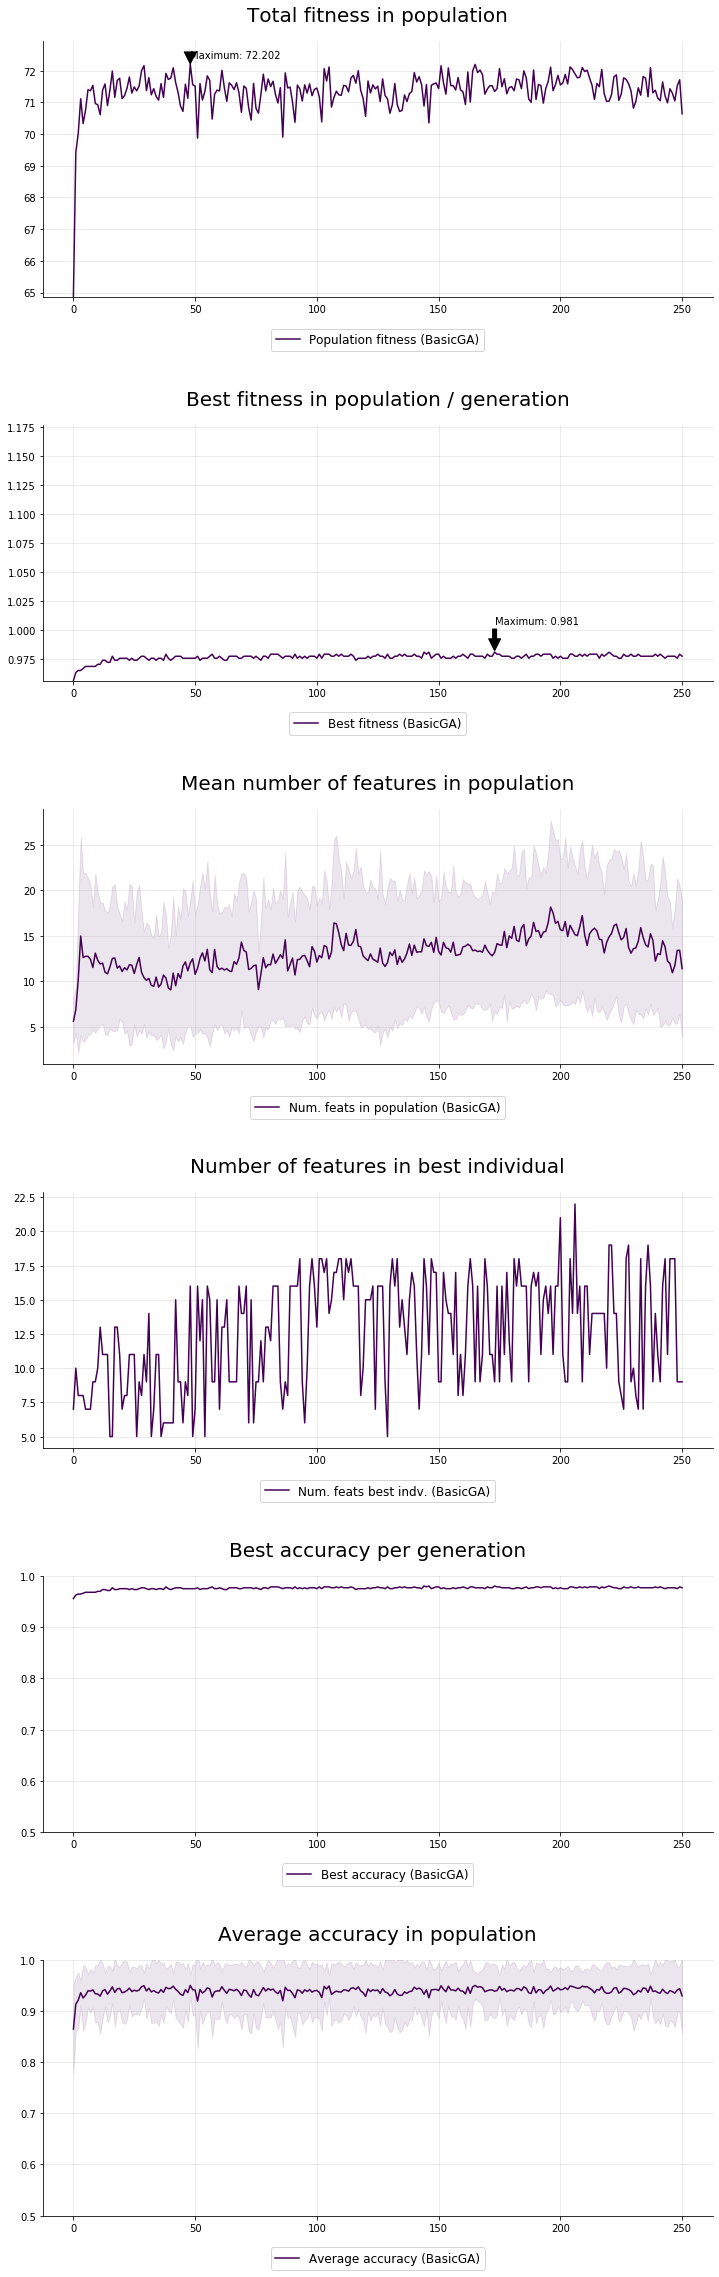

In [10]:
# Visualize the evolution
Plotter.plot_evolution(ga_basic)

In [11]:
# Create an evaluator instance to represent results
evaluator = GAevaluator(ga_basic)

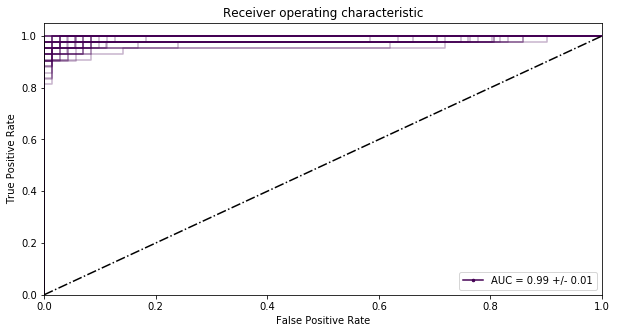

In [12]:
# ROC using 10 repeats of 5-CV
evaluator.roc(cv=5, reps=10)

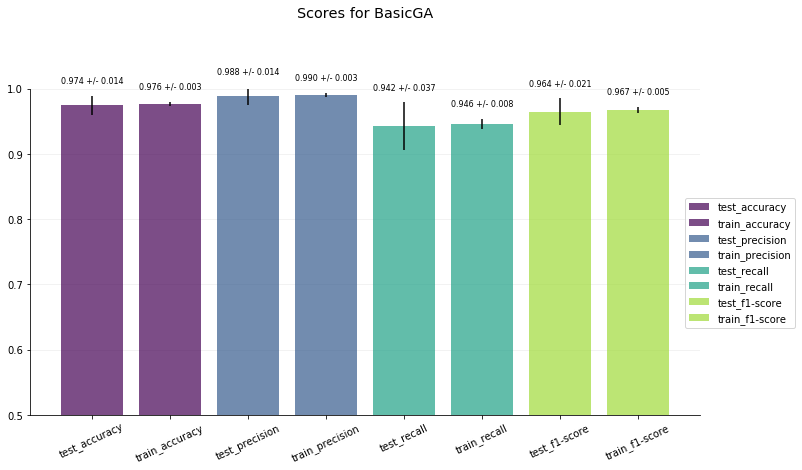

In [13]:
# Evaluate results
evaluator.metrics(cv=5, reps=10, random_state=8888)

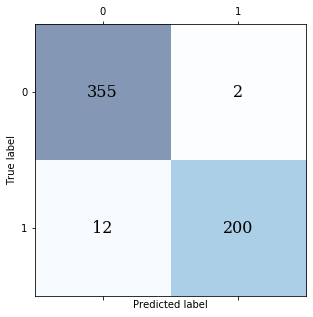

In [14]:
evaluator.training_confusion_matrix()

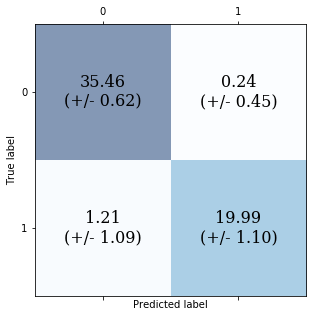

In [15]:
# Explore confusion matrix on training data using 10 repeats of 10-CV
evaluator.test_confusion_matrix(cv=10, reps=10, random_state=11)

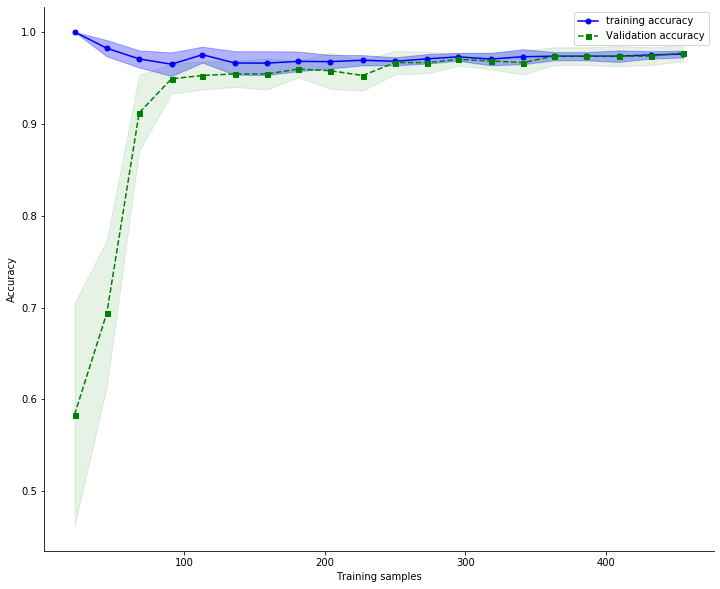

In [16]:
# Plot learning curve
evaluator.plot_learning_curve(cv=5)

# Multiobjective (NSGAII)

In [17]:
# You can customize the function to optimize features or pass various target functions. 
# By default this function consists on 1 - (individual features / total features)
# In section 6. Wrapper (II) (IslandModel) an example is provided

nsga = NSGA2(
    population=Population(size=75), generations=250, fitness=mono_objective, mutation_rate=0.1,
    optimize_features=True, positive_class=1, id="NSGA2", random_state=1111)

# Set feature names
nsga.set_features(features)

In [18]:
nsga = nsga.fit(x_data, y_data)

(NSGAII) Generations (form 0 to 250): 100%|██████████| 250/250 [01:58<00:00,  2.12it/s]


In [19]:
# All attributes
print("nsga.best_features OUT:", nsga.best_features, end="\n\n")
print("nsga.get_current_generation OUT:", nsga.get_current_generation, end="\n\n")
print("nsga.population OUT:", nsga.population, end="\n\n")
print("nsga.population_fitness[:4] OUT:", nsga.population_fitness[:4], end="\n\n")
print("nsga.best_performance OUT:", nsga.best_performance, end="\n\n")
print("nsga.fitness OUT:", nsga.fitness, end="\n\n")
print("nsga.features_function OUT:", nsga.features_function, end="\n\n")
print("nsga.generations OUT:", nsga.generations, end="\n\n")
print("nsga.selection OUT:", nsga.selection, end="\n\n")
print("nsga.mutation_rate OUT:", nsga.mutation_rate, end="\n\n")
print("nsga.imputer OUT:", nsga.imputer, end="\n\n")
print("nsga.crossover OUT:", nsga.crossover, end="\n\n")
print("nsga.positive_class OUT:", nsga.positive_class, end="\n\n")
print("nsga.random_state OUT:", nsga.random_state, end="\n\n")
print("nsga.id OUT:", nsga.id, end="\n\n")

nsga.best_features OUT: [['area_worst', 'concave points_worst'], ['noisy_var_8', 'concave points_worst', 'concavity_se', 'smoothness_mean', 'texture_worst', 'concave points_se', 'fractal_dimension_mean', 'noisy_var_5', 'area_worst', 'noisy_var_4'], ['noisy_var_8', 'texture_worst', 'smoothness_worst', 'concavity_se', 'concave points_worst', 'area_worst'], ['area_worst', 'texture_worst', 'concave points_worst'], ['concave points_worst', 'area_worst', 'texture_worst', 'concavity_se']]

nsga.get_current_generation OUT: 250

nsga.population OUT: Population(size=75, min_feat_init=2, max_feat_init=50)

nsga.population_fitness[:4] OUT: [Solution(values=[0.9561092997981679, 0.96] rank=0 crowding=inf), Solution(values=[0.9806862288464524, 0.8] rank=0 crowding=inf), Solution(values=[0.9789163173420278, 0.88] rank=0 crowding=0.08338440064004386), Solution(values=[0.9754075454122031, 0.94] rank=0 crowding=0.0833844006400435)]

nsga.best_performance OUT: {'accuracy(0)': (0.9561092997981679, 0.980686

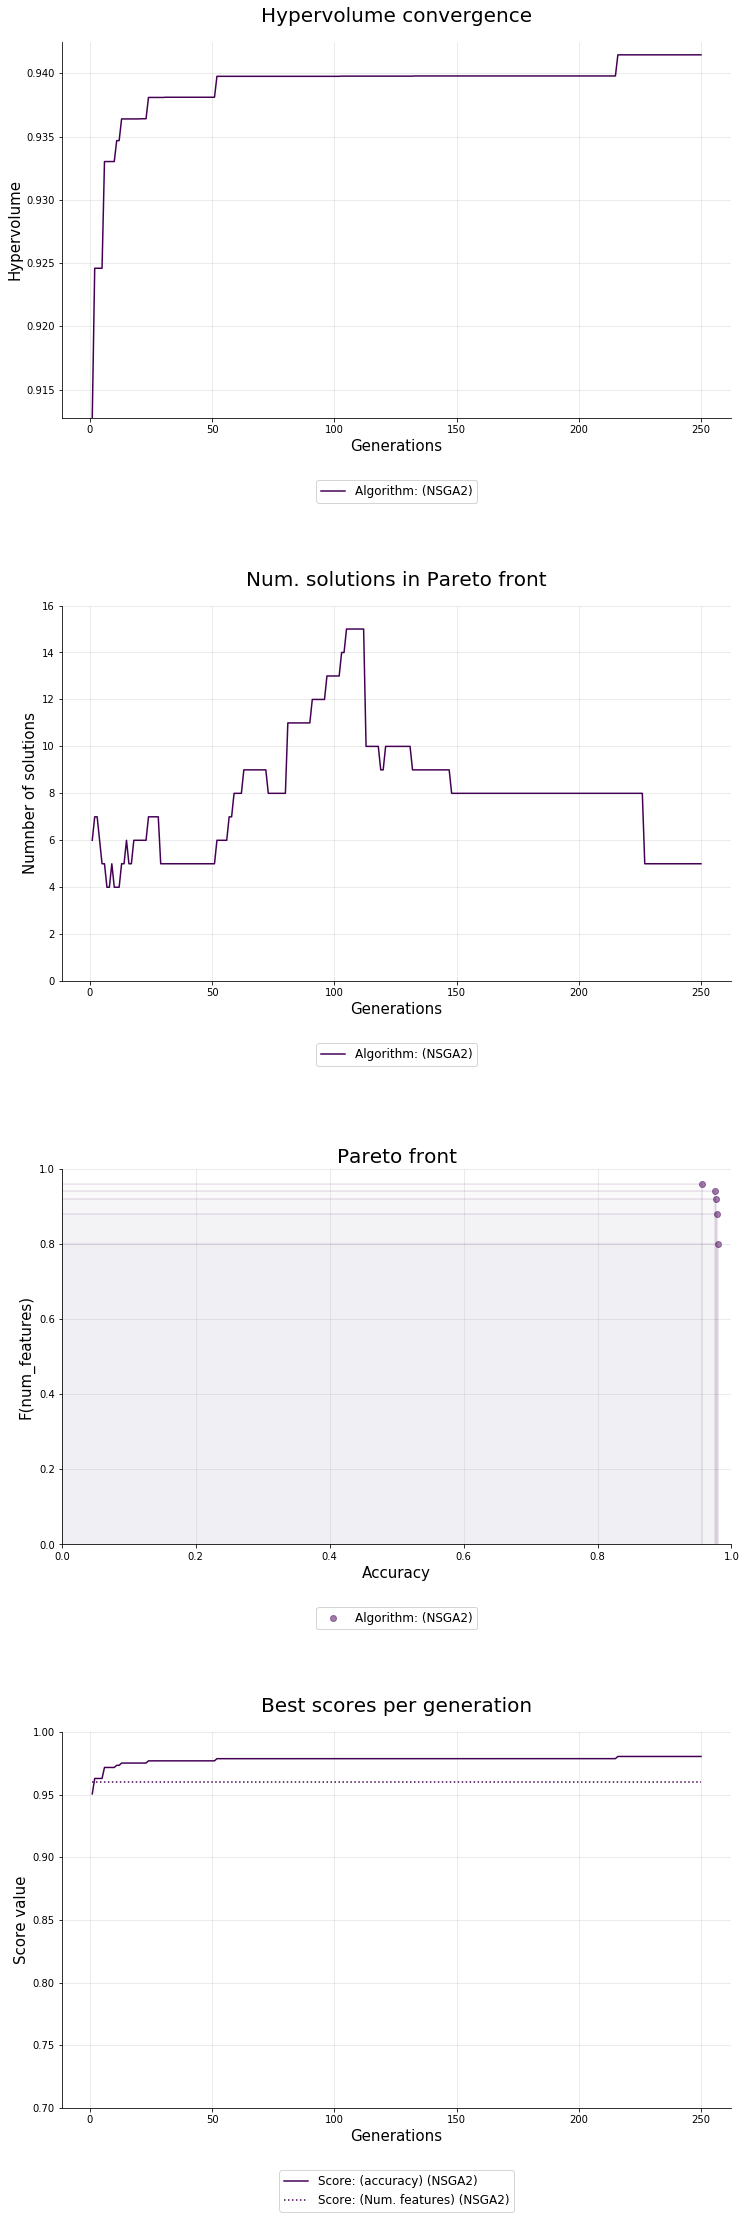

In [20]:
Plotter.plot_evolution(nsga)

In [21]:
evaluator = MOAevaluator(nsga)

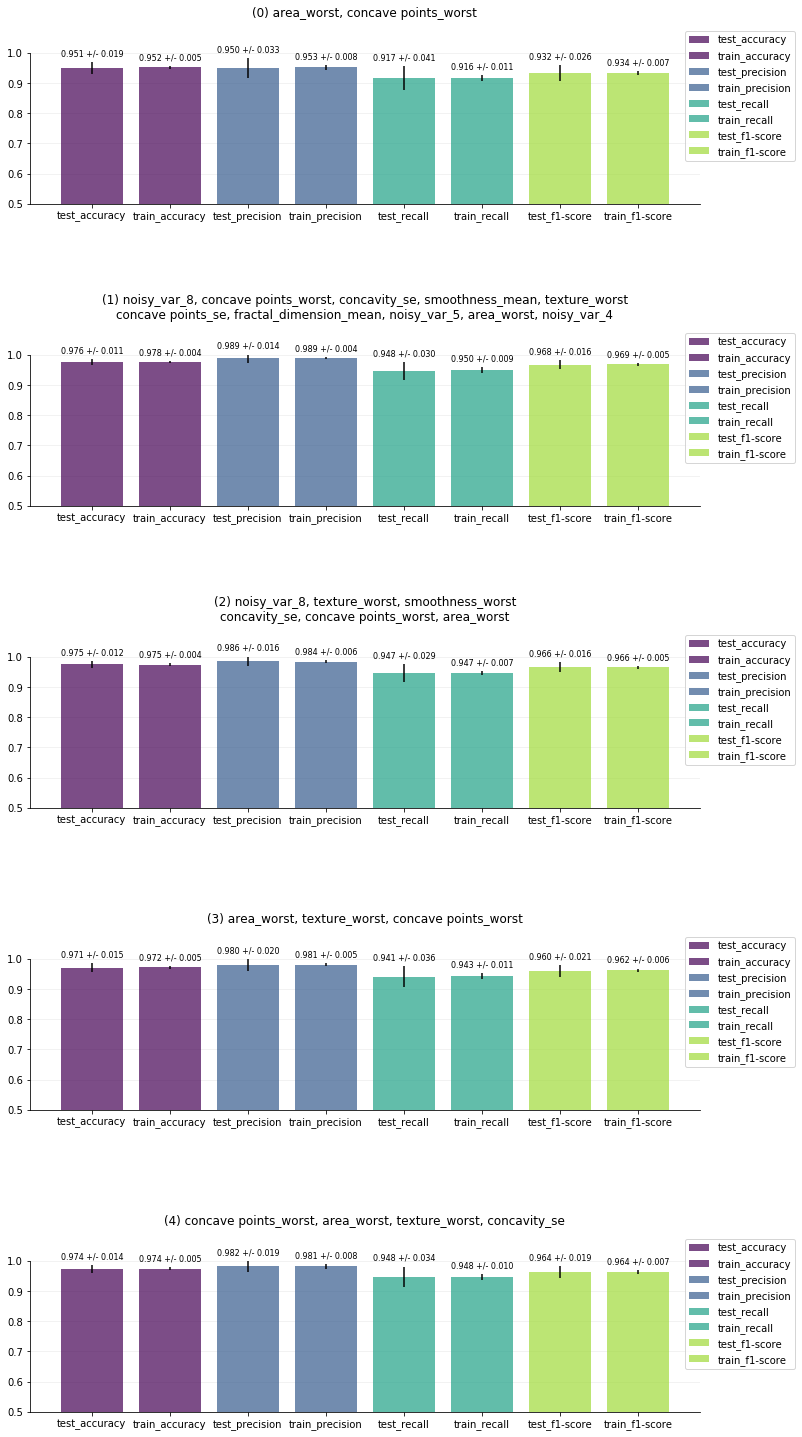

In [22]:
# If no index is specified, cross-validation is applied to all solutions 
# on the non-dominated front
evaluator.metrics(cv=5, reps=10, random_state=1234)

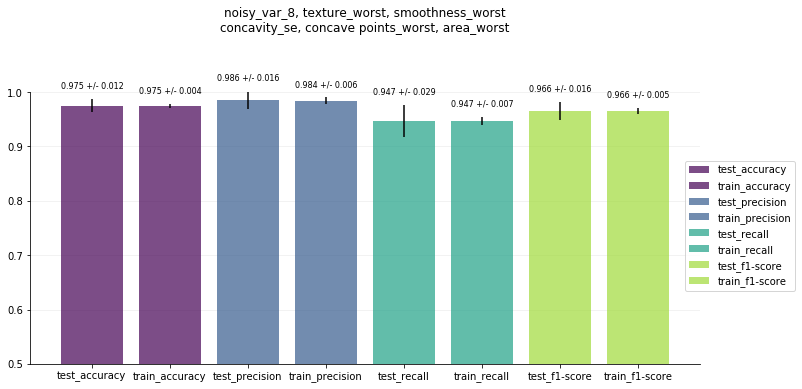

In [23]:
# It is possible to select one representation by index
evaluator.metrics(idx=2, cv=5, reps=10, random_state=1234)

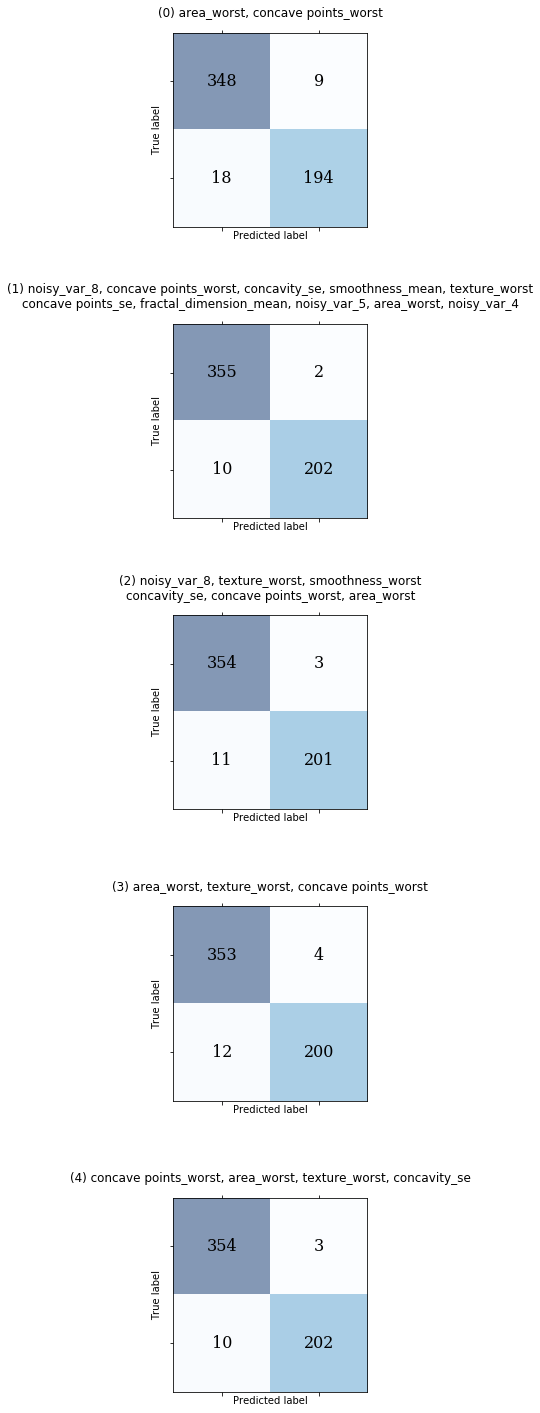

In [24]:
# The functions that compute confusion matrices work like metrics()
evaluator.training_confusion_matrix()

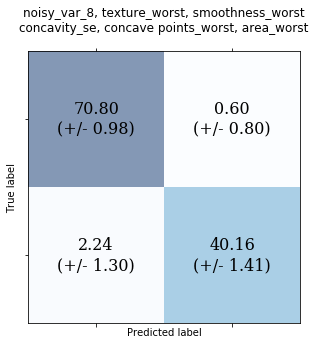

In [25]:
# It is possible to select one representation by index
evaluator.test_confusion_matrix(idx=2, random_state=1234)

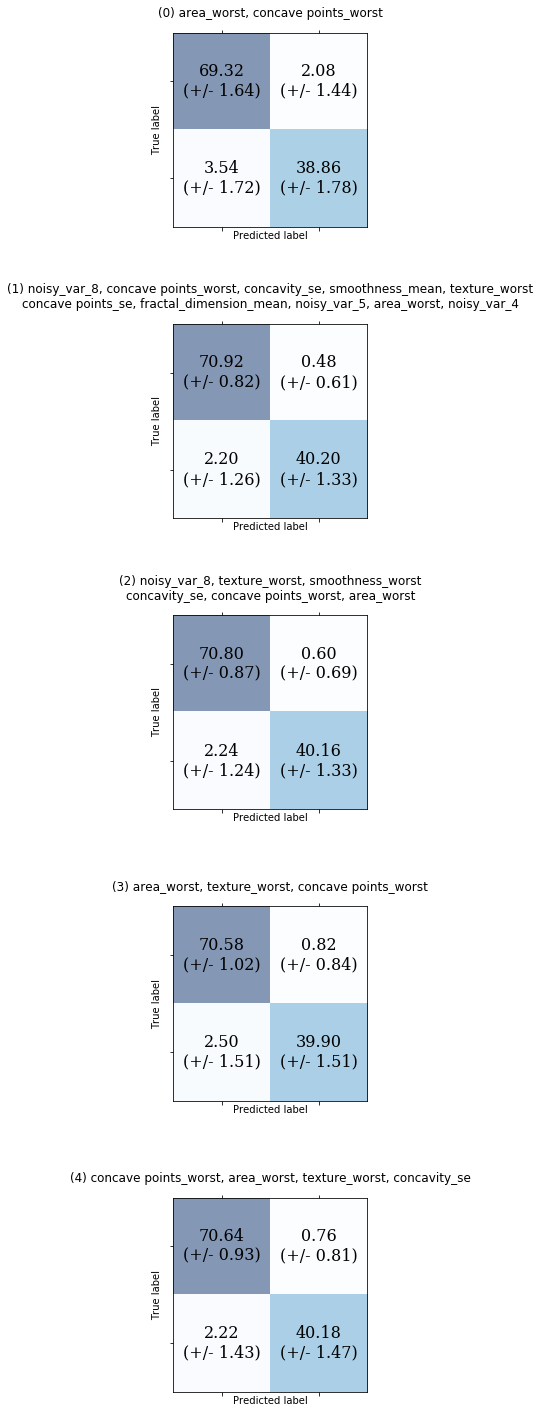

In [26]:
# Confusion matrix using 10 repeats of 5-CV
evaluator.test_confusion_matrix(cv=5, reps=10, random_state=1234)

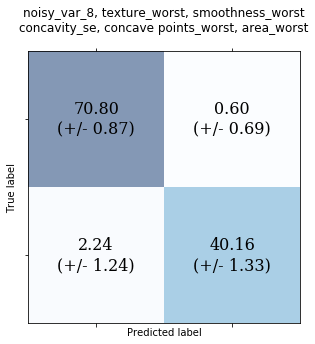

In [27]:
# Confusion matrix on a single solution 
evaluator.test_confusion_matrix(idx=2, cv=5, reps=10, random_state=1234)

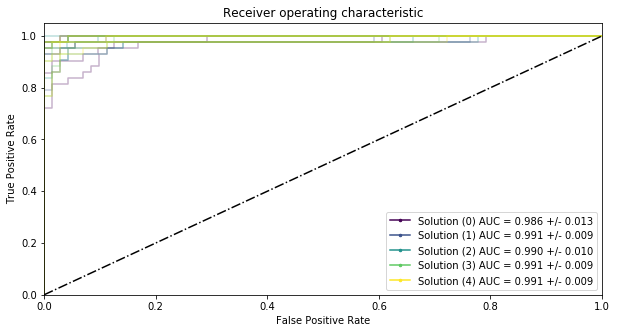

In [28]:
# Compute ROC curve over all solutions 
# (scikit-learn classifier must support probabilities)
evaluator.roc(cv=5, reps=1)

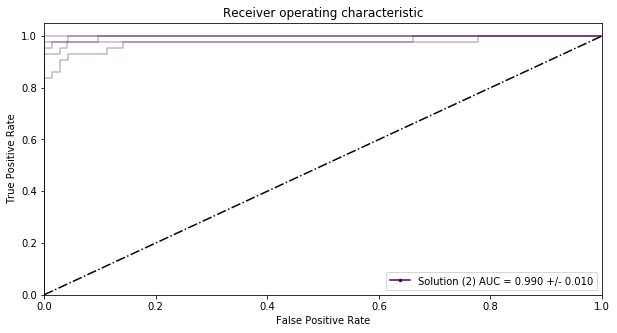

In [29]:
# Compute ROC on a single solution
# (scikit-learn classifier must support probabilities)
evaluator.roc(idx=2, cv=5, reps=1)

# Multiobjective (SPEA2)

In [30]:
# Everything related to performance visualization works just like the NSGAII
# This algorithm introduces an extra argument, the archive length.
# If nothing is specified by default the archive size will be the same as the population.

spea = SPEA2(
    population=Population(size=75), archive_length=75, generations=250, 
    fitness=mono_objective, optimize_features=True, positive_class=1, 
    id="SPEA2", random_state=1111)

# Set feature names
spea.set_features(features)

In [31]:
spea = spea.fit(x_data, y_data)

(SPEA2) Generations (form 0 to 250): 100%|██████████| 250/250 [02:56<00:00,  1.41it/s]


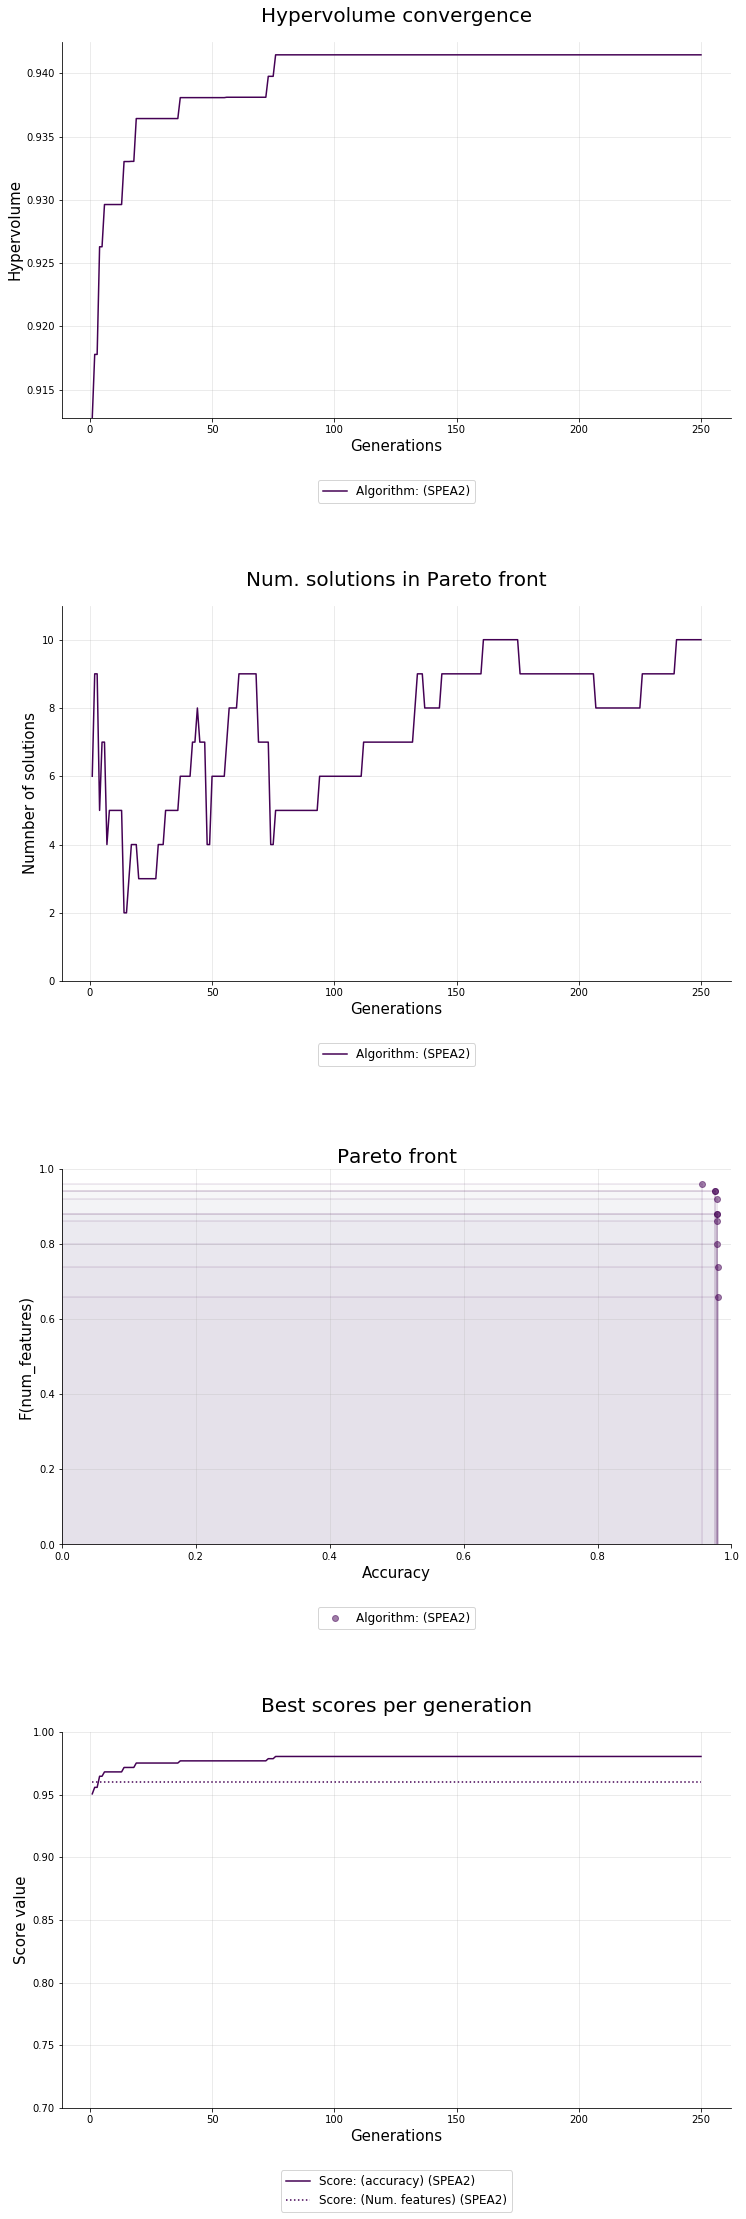

In [32]:
Plotter.plot_evolution(spea)

In [33]:
spea.best_performance

{'accuracy(0)': (0.9789318428815402,
  0.9806241266884024,
  0.9789473684210528,
  0.9560937742586555,
  0.9789163173420276,
  0.9789318428815401,
  0.9753920198726906,
  0.9789318428815401,
  0.9753920198726906,
  0.9806862288464524),
 'feature_scores': (0.86,
  0.74,
  0.8,
  0.96,
  0.92,
  0.88,
  0.94,
  0.88,
  0.94,
  0.6599999999999999),
 'num_features': [7, 13, 10, 2, 4, 6, 3, 6, 3, 17]}

# Wrapper (I) (Parallel

In [34]:
# Here several algorithms are executed using different  
# fitness and selection strategies in parallel

ga_basic_roulette = GA(
    population=Population(size=75), generations=250, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=0.5, elitism=0.3, mutation_rate=0.05, 
    positive_class=1, selection=RouletteWheel(), random_state=7777, 
    id="Mono-Objective(Roulette)")

ga_basic_tournament = GA(
    population=Population(size=75), generations=250, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=0.5, elitism=0.3, mutation_rate=0.05, 
    positive_class=1, selection=tournament, random_state=7777, 
    id="Mono-Objective(Tournament)")

nsga_roulette = NSGA2(
    population=Population(size=75), generations=250, fitness=mono_objective, 
    mutation_rate=0.1, optimize_features=True, positive_class=1, 
    random_state=1111, selection=RouletteWheel(), id="NSGA2 (Roulette)")

nsga_tournament = NSGA2(
    population=Population(size=75), generations=250, fitness=mono_objective, 
    mutation_rate=0.1, optimize_features=True, positive_class=1,
    selection=tournament, random_state=1111, id="NSGA2 (Tournament)")

# Define Parallel wrapper
par = Parallel(ga_basic_roulette, ga_basic_tournament, 
               nsga_roulette, nsga_tournament)

# Set feature names
par.set_features(features)

In [35]:
par = par.fit(x_data, y_data)

(NSGAII) Generations (form 0 to 250): 100%|██████████| 250/250 [02:38<00:00,  1.58it/s]


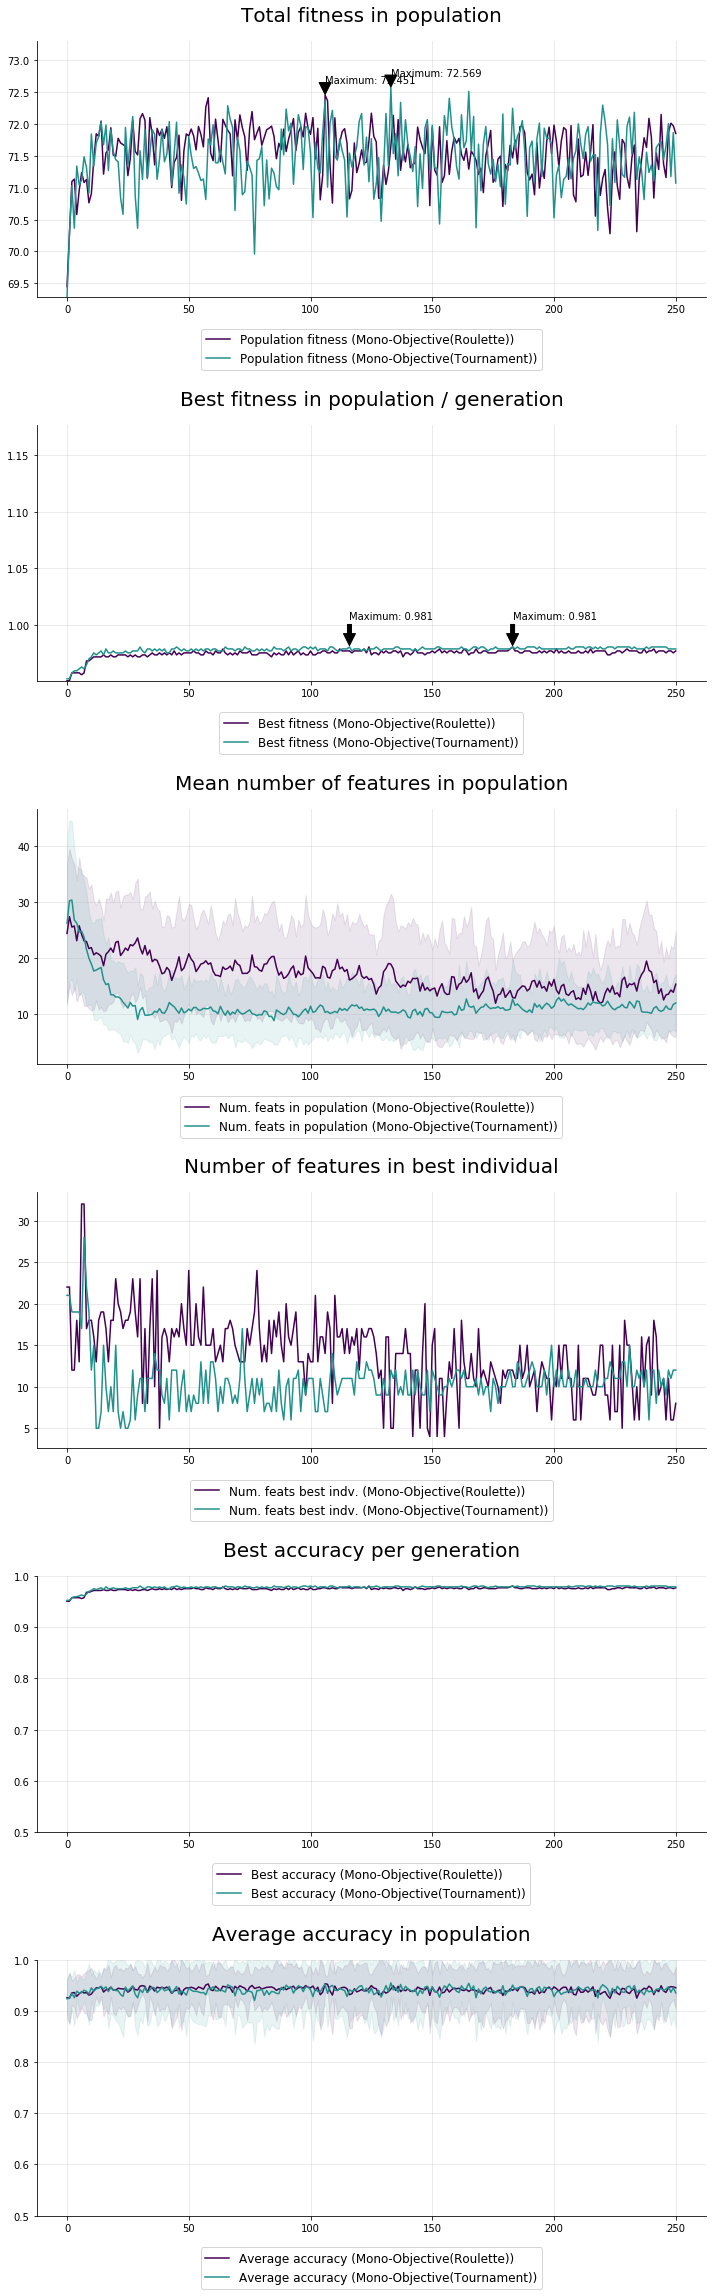

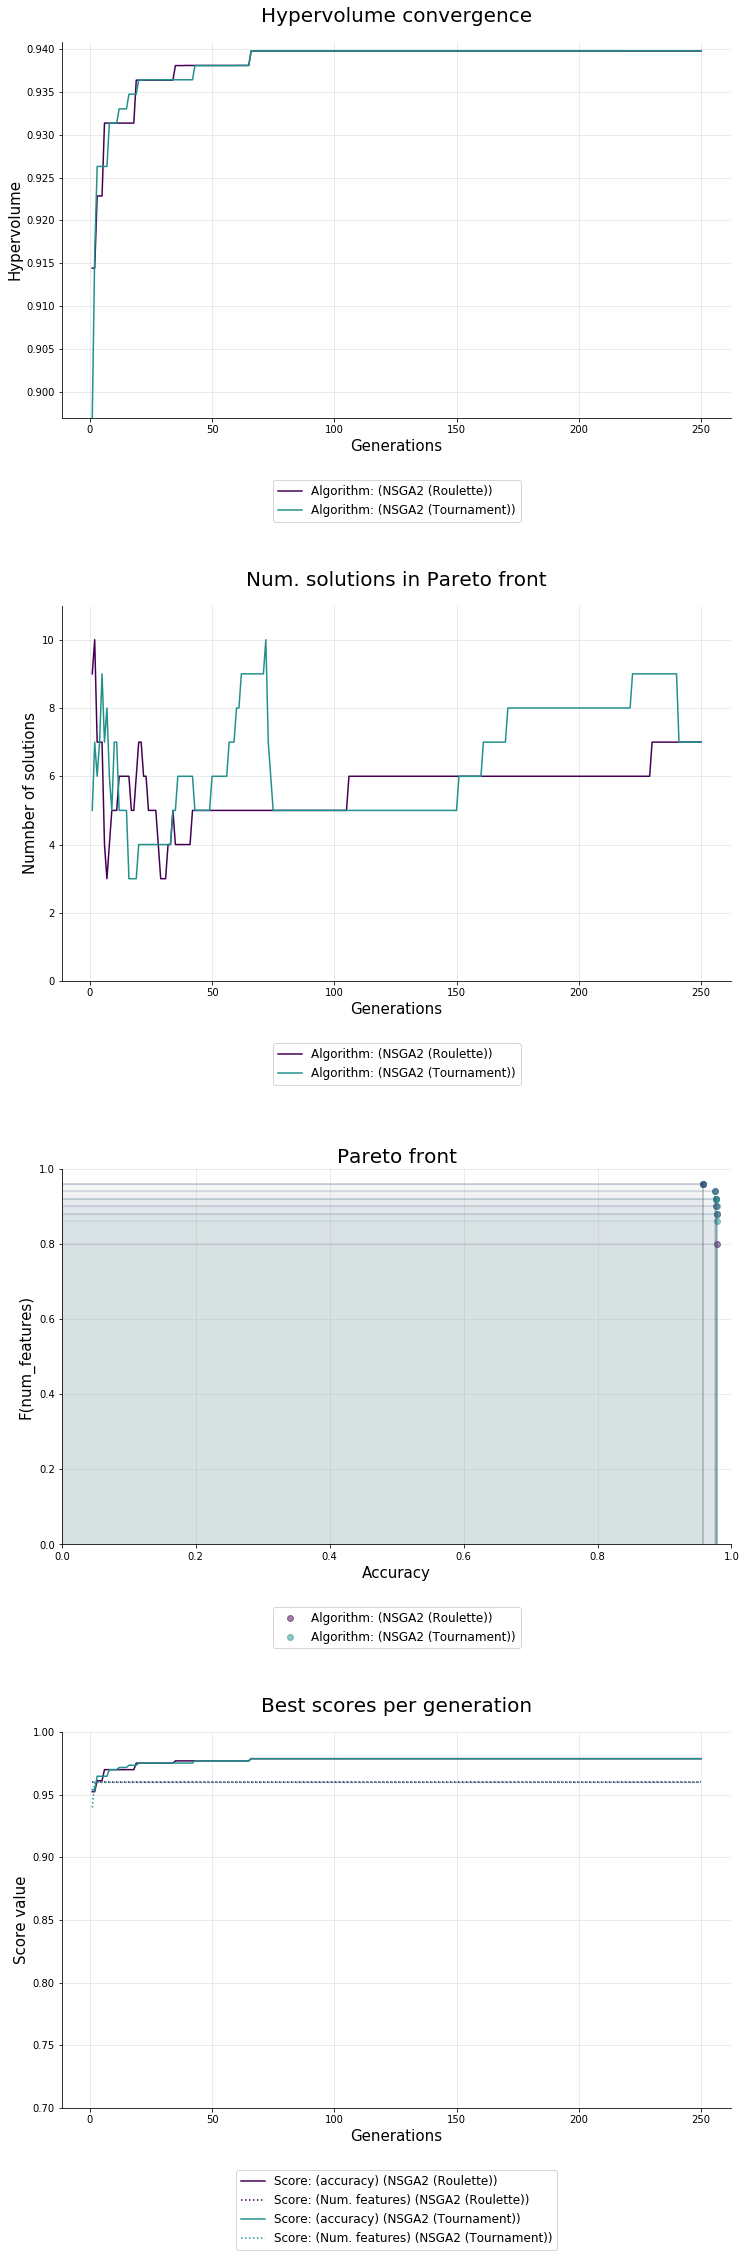

In [36]:
Plotter.plot_evolution(par)

In [37]:
# To recover the selected features
print(par.best_features)

[['noisy_var_12', 'noisy_var_8', 'smoothness_se', 'noisy_var_19', 'symmetry_se', 'noisy_var_5', 'noisy_var_17', 'noisy_var_1', 'smoothness_mean', 'texture_worst', 'area_worst', 'concave points_worst'], ['noisy_var_17', 'texture_worst', 'noisy_var_8', 'noisy_var_5', 'texture_se', 'area_worst', 'concave points_worst', 'noisy_var_7', 'smoothness_worst', 'noisy_var_16', 'smoothness_se'], [['noisy_var_19', 'noisy_var_12', 'noisy_var_14', 'concave points_worst', 'smoothness_se', 'noisy_var_5', 'concavity_se', 'smoothness_worst', 'texture_worst', 'area_worst'], ['perimeter_worst', 'smoothness_worst'], ['area_worst', 'texture_worst', 'concave points_worst'], ['noisy_var_7', 'smoothness_worst', 'area_worst', 'concave points_worst', 'texture_worst'], ['concavity_se', 'concave points_worst', 'texture_worst', 'fractal_dimension_mean', 'noisy_var_7', 'area_worst'], ['area_worst', 'concave points_worst', 'smoothness_mean', 'texture_worst'], ['perimeter_worst', 'smoothness_worst']], [['texture_worst'

# Wrapper (II) (IslandModel)

In [38]:
# Here 3 algorithms with different parameters are executed in parallel
# with 2 intersections (=3 batches) using a user-defined function
# to evaluate the number of features

def features_function(individual, total_feats):
    return pow(1 - (len(individual) / total_feats), 3)

nsga = NSGA2(
    population=Population(size=75), generations=150, fitness=mono_objective, 
    optimize_features=True, features_function=features_function, id="NSGAII")

spea = SPEA2(
    population=Population(size=75), generations=150, fitness=mono_objective, 
    optimize_features=True, features_function=features_function, id="SPEA2")

ga_basic = GA(
    population=Population(size=75), generations=150, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=0.5, elitism=0.3, mutation_rate=0.05, 
    positive_class=1, selection=RouletteWheel(), random_state=7777, 
    id="Mono-Objective(SVM, Roulette)")


# It is possible to combine multiobjective with monoobjective algorithms
glob = IslandModel(nsga, spea, ga_basic, num_batches=3)

glob.set_features(features)

In [39]:
glob = glob.fit(x_data, y_data)

(SPEA2) Generations (form 100 to 150): 100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


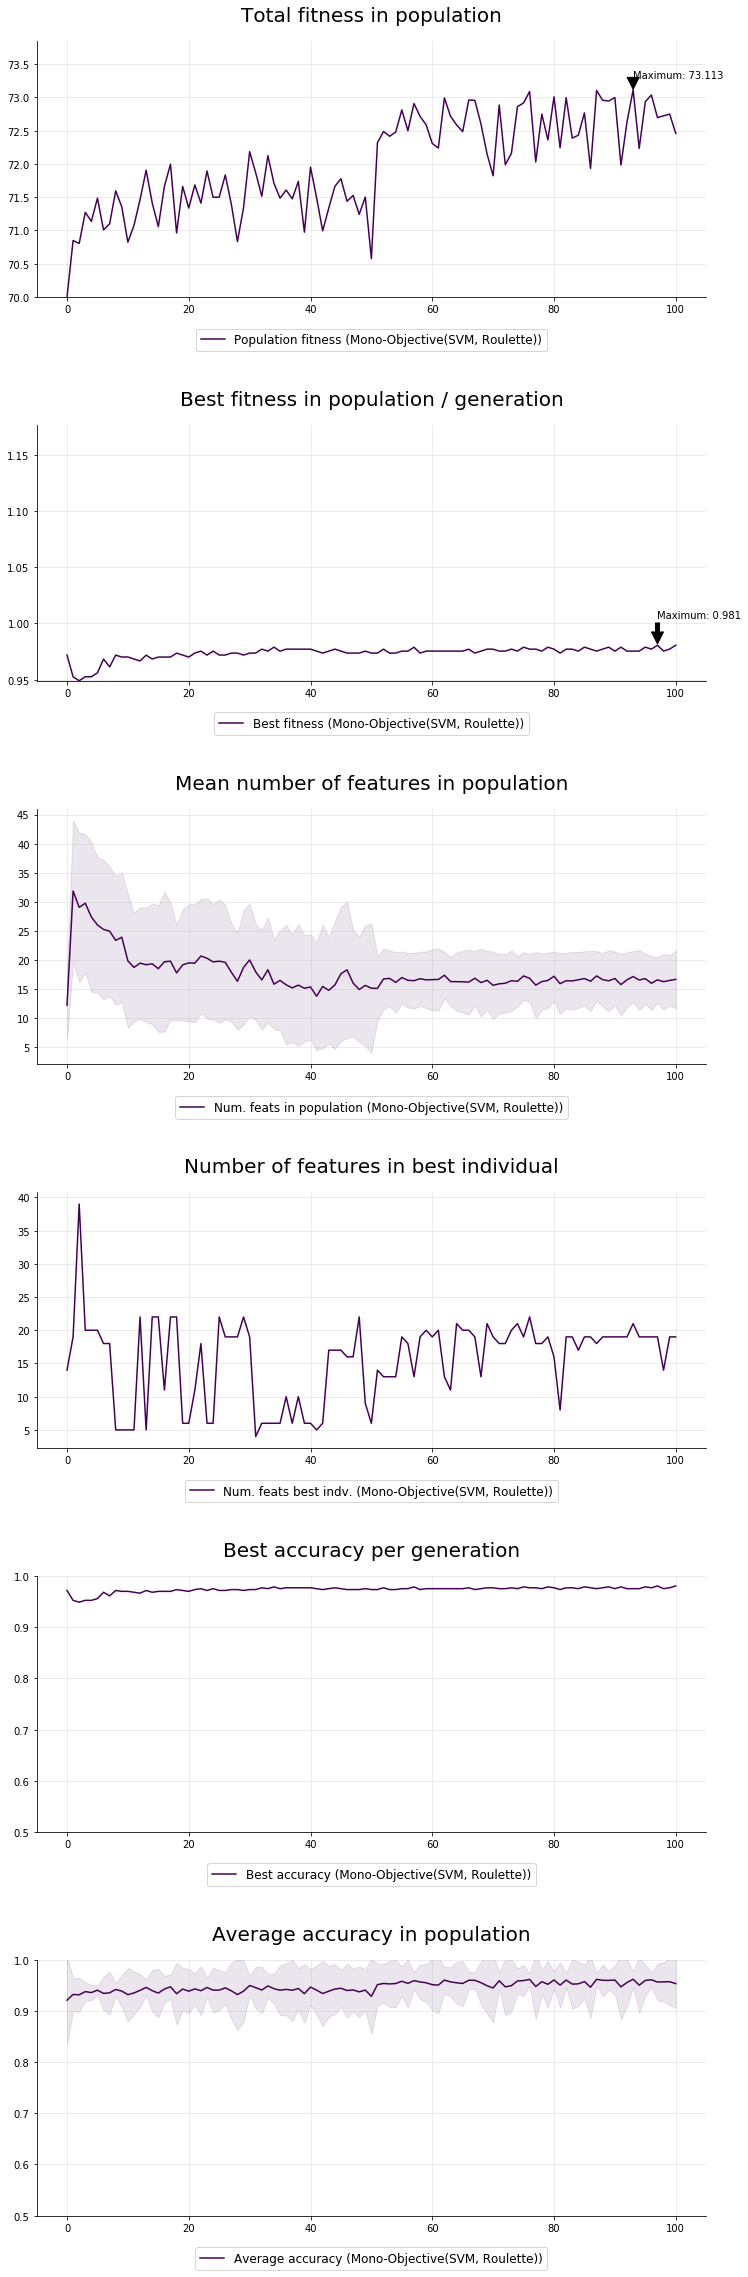

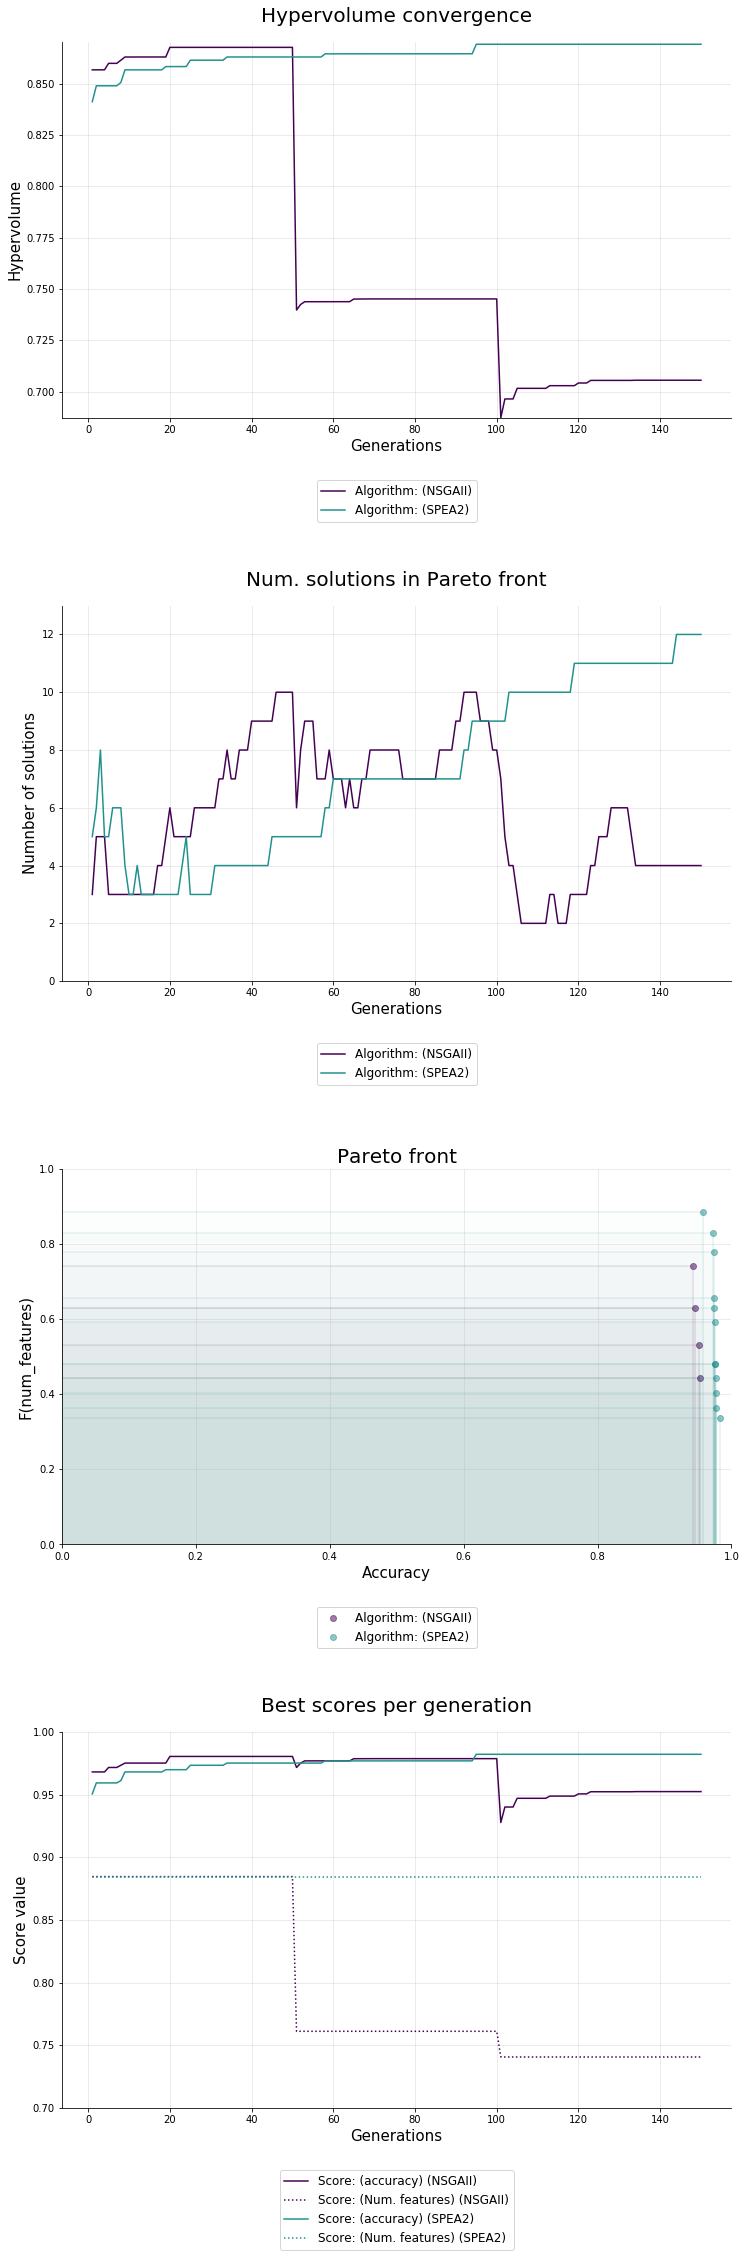

In [40]:
Plotter.plot_evolution(glob)

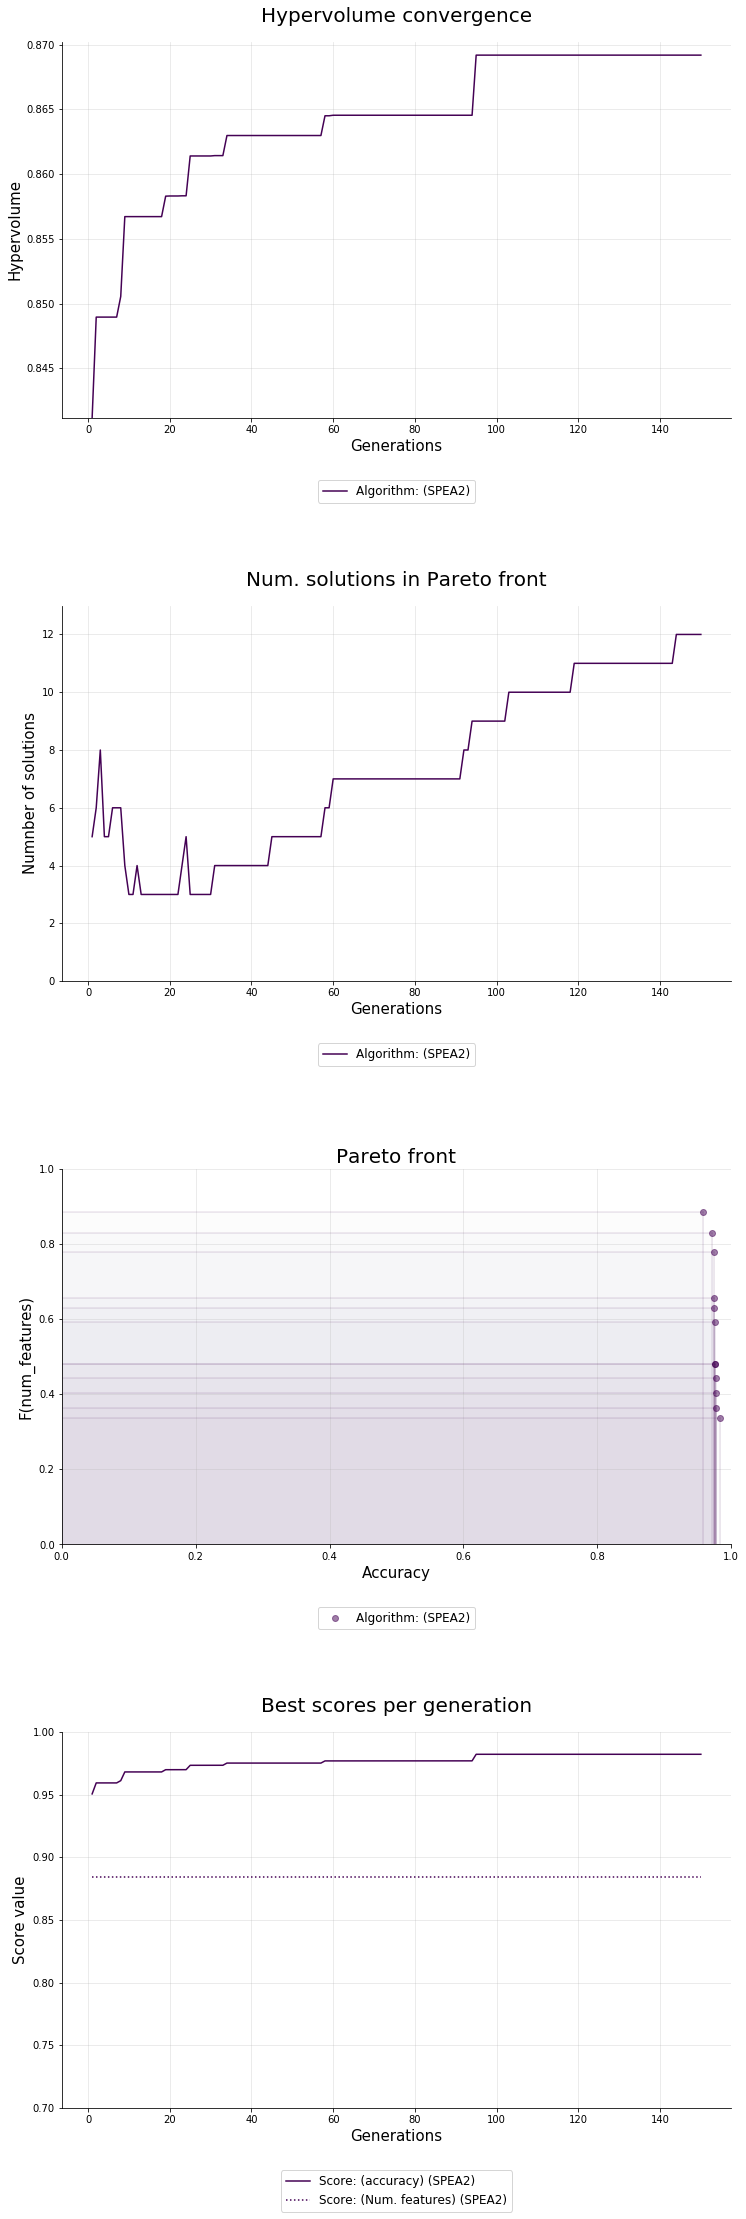

In [41]:
# Both Parallel and IslandModel can access the algorithms through the algorithms attribute
Plotter.plot_evolution(glob.algorithms[1])

In [42]:
# It's also possible save the model
glob.save(overwrite=True)

In [43]:
%ls _PyWinModels

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [44]:
# And load each algorithm from file
loaded_model = NSGA2.load("par(0)_NSGAII")

print("Algorithm %s in generation %d" % (loaded_model.id, loaded_model.get_current_generation))

Algorithm NSGAII in generation 150


# Using blocks (BasicGA)

In [6]:
# Define block structure, all the features must be present in the bocks
test_structure = {
    'radius': ['radius_mean', 'radius_se', 'radius_worst'],
    'texture': ['texture_mean','texture_se', 'texture_worst'],
    'perimeter': ['perimeter_mean', 'perimeter_se', 'perimeter_worst'],
    'area': ['area_mean', 'area_se', 'area_worst'],
    'smoothness': ['smoothness_mean', 'smoothness_se', 'smoothness_worst'],
    'compactness': ['compactness_mean', 'compactness_se', 'compactness_worst'],
    'concavity': ['concavity_mean', 'concave points_mean', 'concavity_se', 
                 'concave points_se', 'concavity_worst', 'concave points_worst'],
    'symmetry': ['symmetry_mean', 'symmetry_se', 'symmetry_worst'],
    'fractals': ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst'],
    'noisy_vars_1_to_10': ['noisy_var_%d' % n for n in range(10)],
    'noisy_vars_10_to_20': ['noisy_var_%d' % n for n in range(10, 20)]
}

# Create a BlockPopulation
block_pop = BlockPopulation(size=50, structure=test_structure, features=features)

In [7]:
ga_1 = GA(
    population=block_pop, generations=100, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=1, elitism=0.3, mutation_rate=0.05, 
    positive_class=1, selection=tournament, random_state=7777, 
    id="GA(filling 100% elite)")

ga_2 = GA(
    population=block_pop, generations=100, fitness=mono_objective, 
    annihilation=0.3, fill_with_elite=0, elitism=0.3, mutation_rate=0.05, positive_class=1,
    selection=tournament, random_state=7777, id="GA(filling 100% random)")

# It is also possible to run the algorithms in parallel
par_block = Parallel(ga_1, ga_2)

In [8]:
par_block = par_block.fit(x_data, y_data)

 (BasicGA) Generations (form 0 to 100): 100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


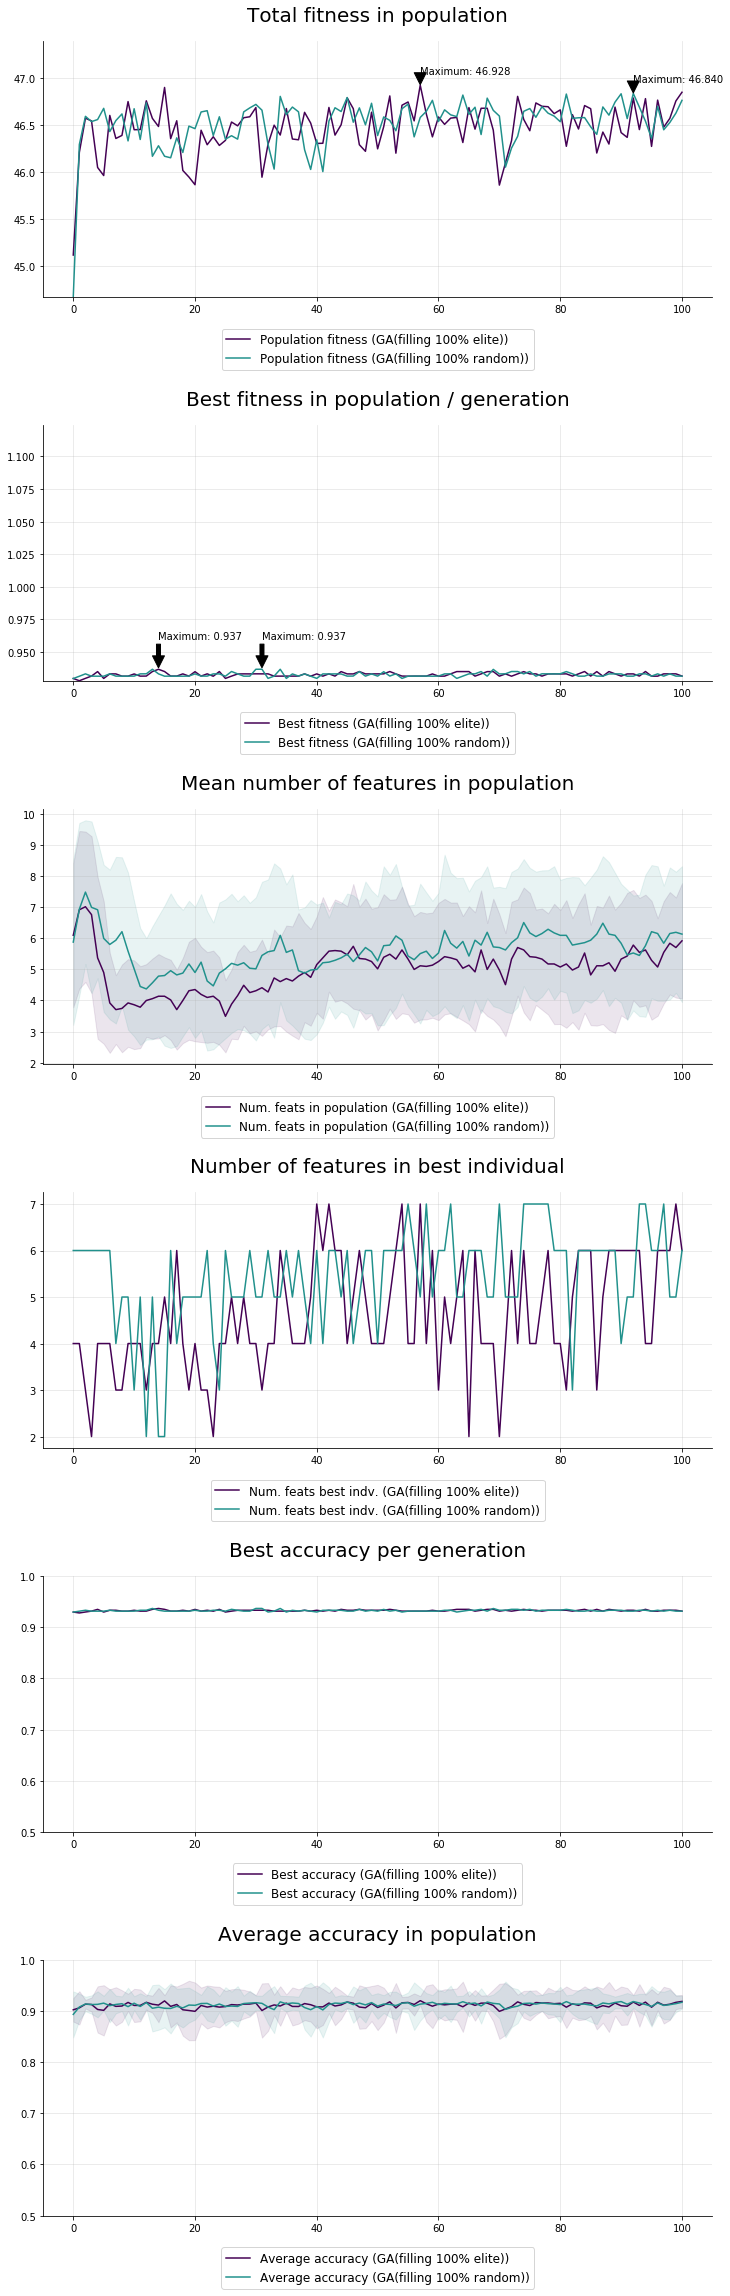

In [9]:
Plotter.plot_evolution(par_block)

In [10]:
# Get selected features, it returns a list with the features 
# selected by each algorithm
par_block.best_features

[['texture', 'fractals', 'area', 'symmetry'],
 ['smoothness', 'concavity', 'radius', 'fractals', 'texture']]

# Using blocks with multi-objectives (SPEA2)

In [11]:
# Everything works the same as before...

block_pop = BlockPopulation(size=75, structure=test_structure, features=features)

spea_blocks = SPEA2(
    population=block_pop, generations=100, fitness=mono_objective, 
    optimize_features=True, positive_class=1, random_state=1111,
    id="SPEA2(Blocks)")

# Set feature names
spea_blocks.set_features(features)

In [12]:
spea_blocks.fit(x_data, y_data)

(SPEA2) Generations (form 0 to 100): 100%|██████████| 100/100 [01:08<00:00,  1.47it/s]


SPEA2(population_size=75 archive_length: 75 generations=100 mutation=None mutation_rate=None selection=TournamentSelection(k=2 replacement=False winners=1) fitness=[MonoObjectiveCV(estimator=GaussianNB(priors=None, var_smoothing=1e-09) cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True) n_jobs=1 score=accuracy] optimize_features=True crossover=OnePoint imputer=None positive_class=1 random_rate=1111

In [13]:
# The same as the previous algorithms (GA)
spea_blocks.best_features

[['symmetry', 'texture']]

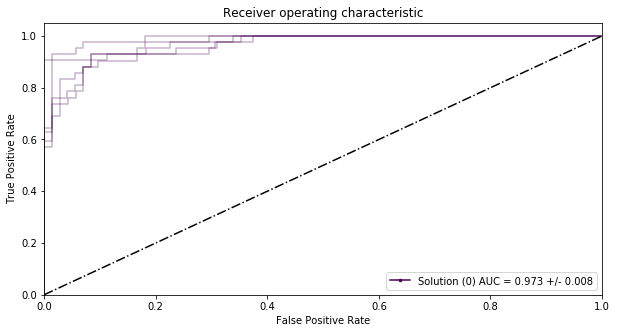

In [14]:
MOAevaluator(spea_blocks).roc()

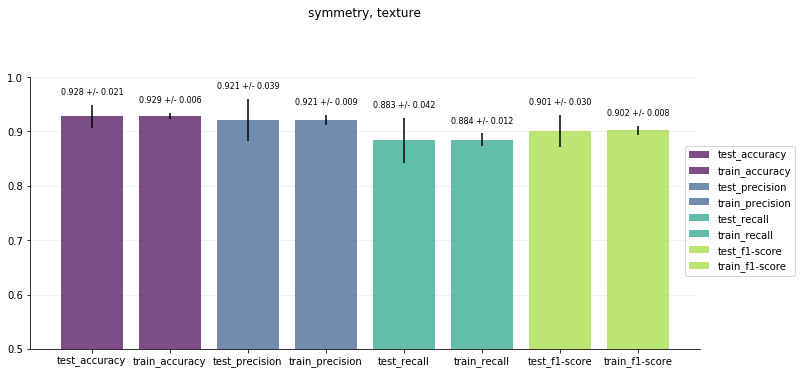

In [15]:
MOAevaluator(spea_blocks).metrics(cv=5, reps=10, random_state=1234)